### **Phase-2 Consolidating Data & Feature Engineering**

**Problem:**
What are the predicted trends for criteria air contaminants (Sulphur dioxide, Nitrogen oxides, volatile organic matter, particulate matter and carbon monoxide) for the next five years?

We import NumPy and Pandas, which are standard libraries for numerical operations and data manipulation in Python.

In [1]:
import numpy as np
import pandas as pd

These two cleaned CSVs represent the NPRI Disposals and Releases datasets from Environment Canada. We load them into DataFrames for processing.



In [2]:
# Load the datasets
df_disposals = pd.read_csv('NPRI_Disposals_Cleaned.csv')
df_releases = pd.read_csv('release_cleaned_data.csv')

In [3]:
# Display first few rows of disposals dataset
df_disposals.head()

,Reporting_Year / Année,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,Units / Unités,Estimation_Method / Méthode_d’estimation,NPRI_ID / No_INRP,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),NAICS / Code_SCIAN,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Underground Injection,Off-site Disposal - Land Treatment,Off-site Disposal - Landfill,Off-site Disposal - Storage,Off-site Disposal - Underground Injection
0,2000,BAYCOAT LTD,Baycoat,tonnes,E - Emission Factor,15,ON,Hamilton,43.24119,-79.74945,NA - 11,Nickel (and its compounds),332810,0.891,0.58,0.0,6.41,21.15,0.46,5.705
1,2000,BAYCOAT LTD,Baycoat,tonnes,C - Mass Balance,15,ON,Hamilton,43.24119,-79.74945,NA - 11,Nickel (and its compounds),332810,0.891,0.58,0.0,6.41,31.40,0.46,5.705
2,2000,BAYCOAT LTD,Baycoat,tonnes,E - Emission Factor,15,ON,Hamilton,43.24119,-79.74945,NA - 04,Chromium (and its compounds),332810,0.891,0.58,0.0,6.41,21.15,0.46,5.705
3,2000,BAYCOAT LTD,Baycoat,tonnes,C - Mass Balance,15,ON,Hamilton,43.24119,-79.74945,NA - 04,Chromium (and its compounds),332810,0.891,0.58,0.0,6.41,21.40,0.46,5.705
4,2000,BAYCOAT LTD,Baycoat,tonnes,C - Mass Balance,15,ON,Hamilton,43.24119,-79.74945,78-93-3,Methyl ethyl ketone,332810,0.891,0.58,0.0,6.41,21.15,0.46,5.705


In [4]:
# Display first few rows of releases dataset
df_releases.head()

,reporting_year,npri_id,company_name,naics_code,naics_title,province,city,latitude,longitude,cas_number,substance_name,units,release_air_fugitive,release_air_other_non_point,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total
0,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,0.015,2.045,370.095,0.471211,5.200000,0.196,0.003
1,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,0.015,2.045,370.095,0.471211,98.056101,0.196,0.003
2,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,0.015,2.045,370.095,0.471211,60.335000,0.196,0.003
3,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,0.015,2.045,370.095,0.471211,7.670000,0.196,0.003
4,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,0.015,2.045,370.095,0.471211,0.665000,0.196,0.003


In [5]:
# Print the shape of both the datasets
print("The shape of the disposals dataset", df_disposals.shape)
print("The shape of the releases dataset", df_releases.shape)

The shape of the disposals dataset (191645, 20)
The shape of the releases dataset (737516, 19)


In [6]:
# Check missing values in both the datasets
print("Missing values in disposals dataset", df_disposals.isnull().sum())
print("Missing values in releases dataset", df_releases.isnull().sum())

Missing values in disposals dataset Reporting_Year / Année                                   0
Company_Name / Dénomination_sociale_de_l'entreprise      0
Facility_Name / Installation                             0
Units / Unités                                           0
Estimation_Method / Méthode_d’estimation                 0
NPRI_ID / No_INRP                                        0
PROVINCE                                                 0
City                                                     0
Latitude                                                 0
Longitude                                                0
CAS_Number / No_CAS                                      0
Substance Name (English) / Nom de substance (Anglais)    0
NAICS / Code_SCIAN                                       0
On-site Disposal - Land Treatment                        0
On-site Disposal - Landfill                              0
On-site Disposal - Underground Injection                 0
Off-site Disposal - 

In [7]:
# Checking the datatypes of both the datasets
print("Data types of disposals dataset", df_disposals.dtypes)
print("Data types of releases dataset", df_releases.dtypes)

Data types of disposals dataset Reporting_Year / Année                                     int64
Company_Name / Dénomination_sociale_de_l'entreprise       object
Facility_Name / Installation                              object
Units / Unités                                            object
Estimation_Method / Méthode_d’estimation                  object
NPRI_ID / No_INRP                                          int64
PROVINCE                                                  object
City                                                      object
Latitude                                                 float64
Longitude                                                float64
CAS_Number / No_CAS                                       object
Substance Name (English) / Nom de substance (Anglais)     object
NAICS / Code_SCIAN                                         int64
On-site Disposal - Land Treatment                        float64
On-site Disposal - Landfill                              f

### Aligning Datasets

In [8]:
# Check duplicates
print("Duplicate values in disposals dataset", df_disposals.duplicated().sum())
print("Duplicate values in releases dataset", df_releases.duplicated().sum())

Duplicate values in disposals dataset 0
Duplicate values in releases dataset 7


In [9]:
# Check unique reporting years in both the datasets
print("Unique reporting years in disposals dataset", df_disposals['Reporting_Year / Année'].unique())  # Use the actual column name
print("Unique reporting years in releases dataset", df_releases['reporting_year'].unique())

Unique reporting years in disposals dataset [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Unique reporting years in releases dataset ['2000-01-01' '2001-01-01' '2002-01-01' '2003-01-01' '2004-01-01'
 '2005-01-01' '2006-01-01' '2007-01-01' '2008-01-01' '2009-01-01'
 '2010-01-01' '2011-01-01' '2012-01-01' '2013-01-01' '2014-01-01'
 '2015-01-01' '2016-01-01' '2017-01-01' '2018-01-01' '2019-01-01'
 '2020-01-01' '2021-01-01' '2022-01-01']


In [10]:
# Drop the duplicates
df_releases.drop_duplicates(inplace=True)

 Standardizes column names so they match the naming style of the df_releases dataset — makes merging and processing easier.

In [11]:
# Renaming the disposals columns
df_disposals = df_disposals.rename(columns={
    'Reporting_Year / Année': 'reporting_year',
    'Company_Name / Dénomination_sociale_de_l\'entreprise': 'company_name',
    'Facility_Name / Installation': 'facility_name',
    'Units / Unités': 'units',
    'Estimation_Method / Méthode_d’estimation': 'estimation_method',
    'NPRI_ID / No_INRP': 'npri_id',
    'PROVINCE': 'province',
    'City': 'city',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'CAS_Number / No_CAS': 'cas_number',
    'Substance Name (English) / Nom de substance (Anglais)': 'substance_name',
    'NAICS / Code_SCIAN': 'naics_code',
    'On-site Disposal - Land Treatment': 'onsite_land_treatment',
    'On-site Disposal - Landfill': 'onsite_landfill',
    'On-site Disposal - Underground Injection': 'onsite_underground_injection',
    'Off-site Disposal - Land Treatment': 'offsite_land_treatment',
    'Off-site Disposal - Landfill': 'offsite_landfill',
    'Off-site Disposal - Storage': 'offsite_storage',
    'Off-site Disposal - Underground Injection': 'offsite_underground_injection'
})


In [12]:
df_disposals.head()

,reporting_year,company_name,facility_name,units,estimation_method,npri_id,province,city,latitude,longitude,cas_number,substance_name,naics_code,onsite_land_treatment,onsite_landfill,onsite_underground_injection,offsite_land_treatment,offsite_landfill,offsite_storage,offsite_underground_injection
0,2000,BAYCOAT LTD,Baycoat,tonnes,E - Emission Factor,15,ON,Hamilton,43.24119,-79.74945,NA - 11,Nickel (and its compounds),332810,0.891,0.58,0.0,6.41,21.15,0.46,5.705
1,2000,BAYCOAT LTD,Baycoat,tonnes,C - Mass Balance,15,ON,Hamilton,43.24119,-79.74945,NA - 11,Nickel (and its compounds),332810,0.891,0.58,0.0,6.41,31.40,0.46,5.705
2,2000,BAYCOAT LTD,Baycoat,tonnes,E - Emission Factor,15,ON,Hamilton,43.24119,-79.74945,NA - 04,Chromium (and its compounds),332810,0.891,0.58,0.0,6.41,21.15,0.46,5.705
3,2000,BAYCOAT LTD,Baycoat,tonnes,C - Mass Balance,15,ON,Hamilton,43.24119,-79.74945,NA - 04,Chromium (and its compounds),332810,0.891,0.58,0.0,6.41,21.40,0.46,5.705
4,2000,BAYCOAT LTD,Baycoat,tonnes,C - Mass Balance,15,ON,Hamilton,43.24119,-79.74945,78-93-3,Methyl ethyl ketone,332810,0.891,0.58,0.0,6.41,21.15,0.46,5.705


## Data Type Conversion

## Disposals Dataset

Convert Data Types
reporting_year → datetime

Strings → category (saves memory)

Numeric columns → float

This helps with performance and future feature engineering.

In [13]:
# Convert 'reporting_year' to datetime (if it represents a date)
df_disposals['reporting_year'] = pd.to_datetime(df_disposals['reporting_year'], format='%Y', errors='coerce')

# Convert categorical columns to 'category' type
categorical_cols = ['company_name', 'facility_name', 'units', 'estimation_method',
                    'province', 'city', 'cas_number', 'substance_name']
df_disposals[categorical_cols] = df_disposals[categorical_cols].astype('category')

# Ensure numerical columns are of correct type (int or float)
numerical_cols = ['npri_id', 'naics_code', 'onsite_land_treatment', 'onsite_landfill',
                  'onsite_underground_injection', 'offsite_land_treatment',
                  'offsite_landfill', 'offsite_storage', 'offsite_underground_injection']
for col in numerical_cols:
    df_disposals[col] = pd.to_numeric(df_disposals[col], errors='coerce')

In [14]:
# Check dtypes of disposals
df_disposals.dtypes

,0
reporting_year,datetime64[ns]
company_name,category
facility_name,category
units,category
estimation_method,category
npri_id,int64
province,category
city,category
latitude,float64
longitude,float64


## Releases Dataset

In [15]:
# Convert 'reporting_year' to datetime
df_releases['reporting_year'] = pd.to_datetime(df_releases['reporting_year'], errors='coerce')

# Convert categorical columns to 'category' type
categorical_cols = ['company_name', 'naics_title', 'province', 'city',
                    'cas_number', 'substance_name', 'units']
df_releases[categorical_cols] = df_releases[categorical_cols].astype('category')

# Ensure numerical columns are of correct type (int or float)
numerical_cols = ['npri_id', 'naics_code', 'latitude', 'longitude',
                  'release_air_fugitive', 'release_air_other_non_point',
                  'release_air_road_dust', 'release_air_spills',
                  'release_air_stack_point', 'release_air_storage_handling',
                  'release_total']
for col in numerical_cols:
    df_releases[col] = pd.to_numeric(df_releases[col], errors='coerce')

In [16]:
# Check dtypes of releases dataset
df_releases.dtypes

,0
reporting_year,datetime64[ns]
npri_id,int64
company_name,category
naics_code,int64
naics_title,category
province,category
city,category
latitude,float64
longitude,float64
cas_number,category


In [17]:
# Iterate through numerical columns specific to each DataFrame
for col in df_disposals.select_dtypes(include=np.number).columns:
    df_disposals[col] = pd.to_numeric(df_disposals[col], errors='coerce', downcast='float')

for col in df_releases.select_dtypes(include=np.number).columns:
    df_releases[col] = pd.to_numeric(df_releases[col], errors='coerce', downcast='float')

In [18]:
# Check dtypes of each dataset
print("Data types of disposals dataset", df_disposals.dtypes)
print("Data types of releases dataset", df_releases.dtypes)

Data types of disposals dataset reporting_year                   datetime64[ns]
company_name                           category
facility_name                          category
units                                  category
estimation_method                      category
npri_id                                 float32
province                               category
city                                   category
latitude                                float32
longitude                               float32
cas_number                             category
substance_name                         category
naics_code                              float32
onsite_land_treatment                   float64
onsite_landfill                         float64
onsite_underground_injection            float64
offsite_land_treatment                  float64
offsite_landfill                        float64
offsite_storage                         float64
offsite_underground_injection           float64
dtype: o

### Merging Datasets

In [19]:
#df_merged = pd.merge(df_disposals, df_releases, on='npri_id', how='left')

Joins the two datasets using npri_id and reporting_year — ensures all records from both datasets are preserved.
This creates _x and _y suffixes where both datasets share column names (e.g., city_x, city_y).

In [20]:
df_merged = pd.merge(df_disposals, df_releases, on=['npri_id', 'reporting_year'], how='outer')
print(df_merged.shape)


(3812928, 37)


In [21]:
# Unique values in reporting year column
print(df_merged['reporting_year'].unique())

<DatetimeArray>
['2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00',
 '2006-01-01 00:00:00', '2007-01-01 00:00:00', '2008-01-01 00:00:00',
 '2009-01-01 00:00:00', '2010-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00',
 '2015-01-01 00:00:00', '2016-01-01 00:00:00', '2017-01-01 00:00:00',
 '2018-01-01 00:00:00', '2019-01-01 00:00:00', '2020-01-01 00:00:00',
 '2021-01-01 00:00:00', '2022-01-01 00:00:00']
Length: 23, dtype: datetime64[ns]


In [22]:
# Print few rows of merged data
df_merged.head()

,reporting_year,company_name_x,facility_name,units_x,estimation_method,npri_id,province_x,city_x,latitude_x,longitude_x,...,cas_number_y,substance_name_y,units_y,release_air_fugitive,release_air_other_non_point,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total
0,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,10049-04-4,Chlorine dioxide,tonnes,0.015,2.045,370.095001,0.471211,5.200000,0.196,0.003
1,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,67-56-1,Methanol,tonnes,0.015,2.045,370.095001,0.471211,98.056099,0.196,0.003
2,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,67-66-3,Chloroform,tonnes,0.015,2.045,370.095001,0.471211,60.334999,0.196,0.003
3,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,75-07-0,Acetaldehyde,tonnes,0.015,2.045,370.095001,0.471211,7.670000,0.196,0.003
4,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,7647-01-0,Hydrochloric acid,tonnes,0.015,2.045,370.095001,0.471211,0.665000,0.196,0.003


In [23]:
# Check duplicate rows
df_merged.duplicated().sum()

np.int64(0)

In [24]:
# Check missing values in merged dataset
df_merged.isnull().sum()

,0
reporting_year,0
company_name_x,404077
facility_name,404077
units_x,404077
estimation_method,404077
npri_id,0
province_x,404077
city_x,404077
latitude_x,404077
longitude_x,404077


In [25]:
print(df_disposals.shape)
print(df_releases.shape)
print(df_merged.shape)

(191645, 20)
(737509, 19)
(3812928, 37)


In [26]:
duplicates = df_merged[df_merged.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 0


In [27]:
missing_values = df_merged.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values


company_name_x                   404077
facility_name                    404077
units_x                          404077
estimation_method                404077
province_x                       404077
city_x                           404077
latitude_x                       404077
longitude_x                      404077
cas_number_x                     404077
substance_name_x                 404077
naics_code_x                     404077
onsite_land_treatment            404077
onsite_landfill                  404077
onsite_underground_injection     404077
offsite_land_treatment           404077
offsite_landfill                 404077
offsite_storage                  404077
offsite_underground_injection    404077
company_name_y                    16568
naics_code_y                      16568
naics_title                       16568
province_y                        16568
city_y                           204940
latitude_y                        16568
longitude_y                       16568


In [28]:
city_mode = df_merged['city_y'].mode()[0]
df_merged['city_y'].fillna(city_mode)


,city_y
0,County of Athabasca
1,County of Athabasca
2,County of Athabasca
3,County of Athabasca
4,County of Athabasca
...,...
3812923,Pemukan
3812924,Demmitt
3812925,Gladys
3812926,Fort McMurray


In [29]:
missing_values = df_merged.isnull().sum()
print(missing_values)  # Display columns with missing values


reporting_year                        0
company_name_x                   404077
facility_name                    404077
units_x                          404077
estimation_method                404077
npri_id                               0
province_x                       404077
city_x                           404077
latitude_x                       404077
longitude_x                      404077
cas_number_x                     404077
substance_name_x                 404077
naics_code_x                     404077
onsite_land_treatment            404077
onsite_landfill                  404077
onsite_underground_injection     404077
offsite_land_treatment           404077
offsite_landfill                 404077
offsite_storage                  404077
offsite_underground_injection    404077
company_name_y                    16568
naics_code_y                      16568
naics_title                       16568
province_y                        16568
city_y                           204940


In [30]:
# Check unique categories number in city_y column
print(df_merged['city_y'].nunique())

4019


In [31]:
print(df_merged['city_y'].cat.categories)


Index([' Greenview No. 16', ' Norman Wells', ' Winslow', '00-08-34-068-22W5',
       '01-16-075-01-6', '01-18-054-24-5', '01-21-36-06W5M', '01-36-51-09 W5M',
       '02-04-001-16W2', '02-06-63-02 W5M',
       ...
       'no physical address', 'pinawa', 'prince george', 'roblin', 'saskatoon',
       'snooks arm', 'st joseph de kamouraska', 'thetford mines',
       'west cadotte', 'ëles-de-la-Madeleine'],
      dtype='object', length=4019)


In [32]:
# Checking data types of merged data
df_merged.dtypes

,0
reporting_year,datetime64[ns]
company_name_x,category
facility_name,category
units_x,category
estimation_method,category
npri_id,float32
province_x,category
city_x,category
latitude_x,float32
longitude_x,float32


This code block cleans and enriches the merged dataset df_merged by filling missing values in the _x columns (e.g., latitude_x, city_x, company_name_x) using corresponding values from the _y columns (e.g., latitude_y, city_y, company_name_y), but only when the npri_id is present and matches in both datasets. By using npri_id as a reliable identifier, the code ensures that only records representing the same facility are used for backfilling, which prevents incorrect data blending across unrelated entries. This targeted approach helps restore missing location and facility information without compromising data accuracy, making it a safe and effective method for cleaning merged environmental datasets.

In [33]:
# Step 1: Convert potentially categorical columns to string (object) to avoid TypeError
df_merged['city_x'] = df_merged['city_x'].astype(str)
df_merged['city_y'] = df_merged['city_y'].astype(str)
df_merged['province_x'] = df_merged['province_x'].astype(str)
df_merged['province_y'] = df_merged['province_y'].astype(str)
df_merged['company_name_x'] = df_merged['company_name_x'].astype(str)
df_merged['company_name_y'] = df_merged['company_name_y'].astype(str)

# Optional: Replace 'nan' strings with actual NaNs again (caused by astype(str))
import numpy as np
df_merged.replace('nan', np.nan, inplace=True)

# Step 2: Create a mask for rows where npri_id is available
same_facility_mask = df_merged['npri_id'].notna()

# Step 3: Safely backfill _x columns using _y data only where _x is missing
df_merged.loc[same_facility_mask & df_merged['latitude_x'].isna(), 'latitude_x'] = \
    df_merged.loc[same_facility_mask & df_merged['latitude_x'].isna(), 'latitude_y']

df_merged.loc[same_facility_mask & df_merged['longitude_x'].isna(), 'longitude_x'] = \
    df_merged.loc[same_facility_mask & df_merged['longitude_x'].isna(), 'longitude_y']

df_merged.loc[same_facility_mask & df_merged['city_x'].isna(), 'city_x'] = \
    df_merged.loc[same_facility_mask & df_merged['city_x'].isna(), 'city_y']

df_merged.loc[same_facility_mask & df_merged['province_x'].isna(), 'province_x'] = \
    df_merged.loc[same_facility_mask & df_merged['province_x'].isna(), 'province_y']

df_merged.loc[same_facility_mask & df_merged['company_name_x'].isna(), 'company_name_x'] = \
    df_merged.loc[same_facility_mask & df_merged['company_name_x'].isna(), 'company_name_y']


If a facility didn’t report a specific release type, it's reasonable to assume it had zero emissions of that type for modeling purposes.

In [34]:
columns_to_fill = [
    'release_air_fugitive',
    'release_air_other_non_point',
    'release_air_road_dust',
    'release_air_spills',
    'release_air_stack_point',
    'release_air_storage_handling',
    'release_total'
]

df_merged[columns_to_fill] = df_merged[columns_to_fill].fillna(0)


This code fixes an error that happens when trying to fill missing values between two columns that are stored as categories (like cas_number_x and cas_number_y). Because the two columns come from different datasets, they don’t have the same list of values (categories), and Pandas doesn't allow you to mix them.

To fix this, the code:

Converts the columns to strings so they can be filled without causing errors.

Replaces any "nan" strings (which show up when converting real NaN values to strings) back into proper NaNs.

Fills missing values in cas_number_x and substance_name_x using the values from cas_number_y and substance_name_y.

In [35]:
# Convert to string to avoid category mismatch errors
df_merged['cas_number_x'] = df_merged['cas_number_x'].astype(str)
df_merged['cas_number_y'] = df_merged['cas_number_y'].astype(str)
df_merged['substance_name_x'] = df_merged['substance_name_x'].astype(str)
df_merged['substance_name_y'] = df_merged['substance_name_y'].astype(str)

# convert 'nan' strings back to real NaNs
import numpy as np
df_merged.replace('nan', np.nan, inplace=True)

# Now safely fill missing values
df_merged['cas_number_x'] = df_merged['cas_number_x'].fillna(df_merged['cas_number_y'])
df_merged['substance_name_x'] = df_merged['substance_name_x'].fillna(df_merged['substance_name_y'])


Fills missing values in naics_code_x using data from the release dataset (naics_code_y).
Then builds a dictionary to match NAICS codes to their industry titles (naics_title).
Finally, fills missing titles based on the NAICS code — giving you a full industry label.



In [36]:
df_merged['naics_code_x'] = df_merged['naics_code_x'].fillna(df_merged['naics_code_y'])

naics_lookup = df_merged.dropna(subset=['naics_code_y', 'naics_title'])\
    .drop_duplicates(subset=['naics_code_y'])\
    .set_index('naics_code_y')['naics_title'].to_dict()

df_merged['naics_title'] = df_merged['naics_title'].fillna(df_merged['naics_code_x'].map(naics_lookup))


If a disposal value is missing, it's safe to assume it’s 0 (i.e., nothing was reported).
This avoids errors later in modeling and analysis.



In [37]:
disposal_columns = [
    'onsite_land_treatment', 'onsite_landfill', 'onsite_underground_injection',
    'offsite_land_treatment', 'offsite_landfill', 'offsite_storage',
    'offsite_underground_injection'
]

df_merged[disposal_columns] = df_merged[disposal_columns].fillna(0)


This code block ensures safe and accurate filling of missing values in the facility_name and units_x columns. First, it converts potentially categorical columns (facility_name, company_name_y, units_x, units_y) to string type to avoid errors when filling data across columns with different category sets. During this conversion, actual missing values (NaN) may turn into the string 'nan', so the code replaces all 'nan' strings back to proper NaN using replace(). Finally, it fills missing facility_name values using company_name_y as a fallback, and fills missing units_x values using units_y, allowing the dataset to retain as much information as possible across both merged sources.



In [38]:
# Convert potentially categorical columns to string type
df_merged['facility_name'] = df_merged['facility_name'].astype(str)
df_merged['company_name_y'] = df_merged['company_name_y'].astype(str)
df_merged['units_x'] = df_merged['units_x'].astype(str)
df_merged['units_y'] = df_merged['units_y'].astype(str)

# Replace literal 'nan' strings with real NaN values (caused by .astype(str))
df_merged.replace('nan', np.nan, inplace=True)

# Fill missing values safely
df_merged['facility_name'] = df_merged['facility_name'].fillna(df_merged['company_name_y'])
df_merged['units_x'] = df_merged['units_x'].fillna(df_merged['units_y'])


Sometimes NAICS title still has missing values. This step:

Ensures the column is in string format to avoid category issues

Replaces bad 'nan' strings with real NaN

Builds a fresh lookup using naics_code_x

Fills any remaining naics_title values

In [39]:
# Convert to string to avoid categorical assignment error
df_merged['naics_title'] = df_merged['naics_title'].astype(str)

# Fix literal 'nan' strings caused by astype(str)

df_merged.replace('nan', np.nan, inplace=True)

# Build the lookup dictionary
naics_title_lookup = df_merged.dropna(subset=['naics_code_x', 'naics_title'])\
    .drop_duplicates(subset=['naics_code_x'])\
    .set_index('naics_code_x')['naics_title'].to_dict()

# Fill missing values using the lookup
df_merged['naics_title'] = df_merged['naics_title'].fillna(df_merged['naics_code_x'].map(naics_title_lookup))


In [40]:
missing_values = df_merged.isnull().sum()
print(missing_values)  # Display columns with missing values

reporting_year                        0
company_name_x                        0
facility_name                         0
units_x                               0
estimation_method                404077
npri_id                               0
province_x                            0
city_x                           134643
latitude_x                            0
longitude_x                           0
cas_number_x                          0
substance_name_x                      0
naics_code_x                          0
onsite_land_treatment                 0
onsite_landfill                       0
onsite_underground_injection          0
offsite_land_treatment                0
offsite_landfill                      0
offsite_storage                       0
offsite_underground_injection         0
company_name_y                    16568
naics_code_y                      16568
naics_title                          47
province_y                        16568
city_y                           204940


In [41]:
df_merged['estimation_method'] = df_merged['estimation_method'].astype(str)
df_merged['estimation_method'].replace('nan', np.nan, inplace=True)
df_merged['estimation_method'] = df_merged['estimation_method'].fillna('Unknown')


<ipython-input-41-be520900d649>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['estimation_method'].replace('nan', np.nan, inplace=True)


In [42]:
missing_values = df_merged.isnull().sum()
print(missing_values)  # Display columns with missing values

reporting_year                        0
company_name_x                        0
facility_name                         0
units_x                               0
estimation_method                     0
npri_id                               0
province_x                            0
city_x                           134643
latitude_x                            0
longitude_x                           0
cas_number_x                          0
substance_name_x                      0
naics_code_x                          0
onsite_land_treatment                 0
onsite_landfill                       0
onsite_underground_injection          0
offsite_land_treatment                0
offsite_landfill                      0
offsite_storage                       0
offsite_underground_injection         0
company_name_y                    16568
naics_code_y                      16568
naics_title                          47
province_y                        16568
city_y                           204940


city_x (131048 missing)

Reason for Missing: This likely indicates that the disposals dataset (df_disposals) didn't include city information for many entries.
How to Handle: Since you have city_y (from the releases dataset) which has no missing values, and you've already filled some city_x values using city_y, you can continue with this approach:

In [43]:
df_merged['city_x'] = df_merged['city_x'].fillna(df_merged['city_y'])

2. company_name_y, naics_code_y, cas_number_y, substance_name_y, units_y (16568 missing each)

Reason for Missing: These columns are from the releases dataset (df_releases), and the missing values indicate entries that didn't have corresponding information in that dataset.
How to Handle: These are likely facilities that only reported disposals, not releases. There's not much you can do to accurately fill these values. You can consider the following:
Leave as NaN: This is often the most honest approach, acknowledging the missing data.
Fill with 'Unknown': If you need to avoid NaNs for certain operations, you can fill them with a placeholder value like 'Unknown'.

In [44]:
columns_to_fill_unknown = ['company_name_y', 'naics_code_y', 'cas_number_y', 'substance_name_y', 'units_y']
df_merged[columns_to_fill_unknown] = df_merged[columns_to_fill_unknown].fillna('Unknown')

3. naics_title (47 missing)

Reason for Missing: These are cases where you couldn't match a NAICS code to an industry title using your lookup dictionary.
How to Handle:
Manual Review: If the number is small (47 in this case), you might consider manually researching the missing NAICS codes and filling in the titles.
Fill with 'Other': If manual review isn't practical, you can fill with 'Other' or a similar category.

In [45]:
df_merged['naics_title'] = df_merged['naics_title'].fillna('Other')

In [46]:
# Check the final missing values
missing_values = df_merged.isnull().sum()
print(missing_values)  # Display columns with missing values

reporting_year                        0
company_name_x                        0
facility_name                         0
units_x                               0
estimation_method                     0
npri_id                               0
province_x                            0
city_x                           134643
latitude_x                            0
longitude_x                           0
cas_number_x                          0
substance_name_x                      0
naics_code_x                          0
onsite_land_treatment                 0
onsite_landfill                       0
onsite_underground_injection          0
offsite_land_treatment                0
offsite_landfill                      0
offsite_storage                       0
offsite_underground_injection         0
company_name_y                        0
naics_code_y                          0
naics_title                           0
province_y                        16568
city_y                           204940


In [47]:
# Function to get the most frequent city
def get_most_frequent_city(group):
    city = group['city_x'].mode()
    if len(city) > 0 and city[0] is not np.nan:
        return city[0]
    else:
        city = group['city_y'].mode()
        if len(city) > 0 and city[0] is not np.nan:
            return city[0]
        else:
            return np.nan  # Return NaN if no city found

# Apply the function to fill missing 'city_x' values
df_merged['city_x'] = df_merged.groupby(['facility_name', 'province_x'])['city_x'].transform(lambda x: x.fillna(get_most_frequent_city(df_merged.loc[x.index])))

<ipython-input-47-9a7c3043602b>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['city_x'] = df_merged.groupby(['facility_name', 'province_x'])['city_x'].transform(lambda x: x.fillna(get_most_frequent_city(df_merged.loc[x.index])))


In [48]:
# Check the mode of the city column
mode_city = df_merged['city_x'].mode()
print(mode_city)

0    Fort McMurray
Name: city_x, dtype: object


In [49]:
for col in ['province_y', 'city_y', 'latitude_y', 'longitude_y']:
    df_merged[col] = df_merged[col].fillna(df_merged.groupby('npri_id')[col.replace('_y', '_x')].transform('first'))

In [50]:
missing_values = df_merged.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values

city_x    10103
city_y     5233
dtype: int64


1. city_x (10103 missing)

Problem: These are likely facilities for which city information is not available even after using the facility name and province proxy.

Solution: We can attempt to further refine our approach by considering the latitude and longitude coordinates. Here's how:

Geocoding: Use a geocoding service (like the geopy library) to convert the latitude and longitude coordinates (latitude_x, longitude_x) to city names.
Fill Missing: Fill missing values in city_x using the geocoded city names.

In [51]:
#!pip install geopy==2.3.0

#from geopy.geocoders import Nominatim

#eolocator = Nominatim(user_agent="my_geocoder") # Choose a user agent

#def get_city_from_coordinates(row):
#    if pd.isnull(row['city_x']):
#        try:
#            location = geolocator.reverse((row['latitude_x'], row['longitude_x']))
#            city = location.raw['address'].get('city')
#            return city
#        except:
#            return np.nan
#    else:
#        return row['city_x']

#df_merged['city_x'] = df_merged.apply(get_city_from_coordinates, axis=1)

In [52]:
from sklearn.neighbors import NearestNeighbors

# Create a subset of data with known city_x values
known_cities = df_merged[df_merged['city_x'].notnull()]

# Create a NearestNeighbors model
nn = NearestNeighbors(n_neighbors=1)
nn.fit(known_cities[['latitude_x', 'longitude_x']])

# Find the nearest neighbor for each facility with missing city_x
distances, indices = nn.kneighbors(df_merged[df_merged['city_x'].isnull()][['latitude_x', 'longitude_x']])

# Impute missing city_x values using the nearest neighbor's city
df_merged.loc[df_merged['city_x'].isnull(), 'city_x'] = known_cities.iloc[indices.flatten()]['city_x'].values

In [53]:
# Check missing values in city_x column
missing_values = df_merged['city_x'].isnull().sum()
print(f"Number of missing values in city_x: {missing_values}")

Number of missing values in city_x: 0


The dataset contained two columns representing the city where a facility is located: city_x (from the disposals dataset) and city_y (from the releases dataset). Both columns had missing values, requiring imputation to ensure data completeness.

Analysis of city_x and city_y:

Unique Values: Both columns shared a large number of common unique city names, indicating significant overlap in the cities represented.
Frequency Distribution: While there were some differences in the frequency of individual cities, the overall distributions were largely consistent, with the top cities being the same in both columns.
Cramér's V: A high Cramér's V value (0.985) indicated a very strong association between the two columns, further supporting the idea that they represent the same underlying feature.
Imputation Strategy:

Imputation using city_x: Given the high similarity between city_x and city_y, it was determined that using city_x to impute missing values in city_y would be the most accurate and efficient approach. This was done using the following code:

df_merged['city_y'] = df_merged['city_y'].fillna(df_merged['city_x'])
Use code with caution
Handling Remaining Missing Values (if any): If any missing values remained in either column after this initial imputation, other strategies like imputation based on facility name and province or KNN imputation could be considered. However, since the two columns were highly similar, these additional imputation steps might not be necessary in most cases.
Dropping city_y:

After imputing missing values in city_y using city_x, it was decided to drop the city_y column to avoid redundancy and potential issues with multicollinearity in future analysis or modeling. This was done using the following code:

In [54]:
unique_cities_x = df_merged['city_x'].unique()
unique_cities_y = df_merged['city_y'].unique()

print("Unique cities in city_x:", unique_cities_x)
print("Unique cities in city_y:", unique_cities_y)

common_cities = set(unique_cities_x) & set(unique_cities_y)
print("Common cities:", common_cities)

Unique cities in city_x: ['County of Athabasca' 'PINE FALLS' 'LAVAL' ... 'Altario' 'Demmitt'
 'Gladys']
Unique cities in city_y: ['County of Athabasca' 'PINE FALLS' 'LAVAL' ... 'Altario' 'Demmitt'
 'Gladys']
Common cities: {'Lamont', 'ST-HUBERT', 'Wallace Woodworth', 'MACKENZIE', 'Mark Pembina', 'SCHREIBER', 'Nanticoke', 'Hughenden', 'ALMA PLATFORM', 'RIGEL', 'Otterville', 'WILLESDEN GREEN', 'Sept-ëles', 'Yellowknife', 'Inukjuak', 'BRAZEAU', 'Saint-Etienne-des-Gr\x8fs', 'LESLIEVILLE', 'WONOWON', 'BULRUSH', 'TROIS RIVIERES', 'Denfield', 'BRACEBRIDGE, DISTRICT OF MUSKOKA', 'Qu\x8ebec', 'Orillia', 'Vaughan', 'ROLLA', 'Shaunavon', 'Norwich', 'WATERLOO', 'FAIRVIEW', 'Wilson Creek', 'STOUGHTON', 'LAPRISE', 'Twining', 'MOWAT TWP.', 'Seal Lake', '15-24-077-12W5', 'PETIT-SAGUENAY', 'Cecil', 'Lazo', 'FRASER LAKE', 'NORTH VANCOUVER', 'FREEMAN TP.', 'Tuktoyaktuk', 'Willesden Green', 'GLENCOE', 'CLARENVILLE', 'COATICOOK', 'MACKENZIE COUNTY', 'ABBOTSFORD', 'VICTORIA', 'OXBOW', 'MELANCTHON', 'BETTY L

In [55]:
city_x_counts = df_merged['city_x'].value_counts()
city_y_counts = df_merged['city_y'].value_counts()

print("City counts in city_x:\n", city_x_counts)
print("\nCity counts in city_y:\n", city_y_counts)

City counts in city_x:
 city_x
Fort McMurray      243096
Edmonton           203509
Hamilton           198283
Sarnia             177677
Corunna             85047
                    ...  
GLEN EVVEN              1
BYEMOOR                 1
13-30-087-7W5           1
09-02-088-08W           1
M.D. OF BRAZEAU         1
Name: count, Length: 4128, dtype: int64

City counts in city_y:
 city_y
Fort McMurray            243116
Hamilton                 198358
Edmonton                 189209
Sarnia                   177677
Corunna                   85047
                          ...  
St-Valrien de Milton         1
Standard                      1
Athabasca                     1
Wallace Woodworth             1
Battle Lake                   1
Name: count, Length: 4105, dtype: int64


In [56]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_merged['city_x'], df_merged['city_y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
phi = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print("Cramér's V:", phi)

Cramér's V: 0.9855710514394752


In [57]:
df_merged['city_y'] = df_merged['city_y'].fillna(df_merged['city_x'])

In [58]:
df_merged = df_merged.drop('city_y', axis=1)

In [59]:
# Check missing values again
missing_values = df_merged.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values

Series([], dtype: int64)


In [60]:
df_merged = df_merged.rename(columns={'city_x': 'city'})

In [61]:
df_merged.isnull().sum()

,0
reporting_year,0
company_name_x,0
facility_name,0
units_x,0
estimation_method,0
npri_id,0
province_x,0
city,0
latitude_x,0
longitude_x,0


In [62]:
# Function to check missing values, nan count, zeroes
import pandas as pd
import numpy as np

def check_missing_values(df):
    """
    Checks for missing values (NaN, zero, empty string, special missing values) in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with counts of different types of missing values for each column.
    """

    missing_counts = df.isnull().sum()  # Count of missing values (NaN)
    zero_counts = (df == 0).sum()  # Count of zeros
    empty_string_counts = (df == '').sum()  # Count of empty strings
    special_missing = ['N/A', '?', '-', 'n/a', 'nan']
    special_missing_values = df.isin(special_missing).sum()  # Count of special missing values

    # Create a DataFrame with the results
    result = pd.DataFrame({
        'Missing (NaN) Count': missing_counts,
        'Zero Count': zero_counts,
        'Empty String Count': empty_string_counts,
        'Special Missing Values Count': special_missing_values
    })

    return result

# Apply the function to your DataFrame (e.g., df_encoded)
missing_values_report = check_missing_values(df_merged)

# Display the results
missing_values_report

,Missing (NaN) Count,Zero Count,Empty String Count,Special Missing Values Count
reporting_year,0,0,0,0
company_name_x,0,0,0,0
facility_name,0,0,0,0
units_x,0,0,0,0
estimation_method,0,0,0,0
npri_id,0,0,0,0
province_x,0,0,0,0
city,0,0,0,0
latitude_x,0,571,0,0
longitude_x,0,571,0,0


# Feature Engineering

## 1. Feature Engineering

1. Total Quantity Disposed Of:

Create a new feature called Total_Quantity_Disposed_of by summing the quantities from the different disposal columns (onsite and offsite).

In [63]:
disposal_columns = ['onsite_land_treatment', 'onsite_landfill', 'onsite_underground_injection',
                    'offsite_land_treatment', 'offsite_landfill', 'offsite_storage',
                    'offsite_underground_injection']
df_merged['Total_Quantity_Disposed_of'] = df_merged[disposal_columns].sum(axis=1)

2. Total Quantity Released:

Create a new feature called Total_Quantity_Released by summing the quantities from different release columns.

In [64]:
release_columns = ['release_air_fugitive', 'release_air_other_non_point', 'release_air_road_dust',
                    'release_air_spills', 'release_air_stack_point', 'release_air_storage_handling']
df_merged['Total_Quantity_Released'] = df_merged[release_columns].sum(axis=1)

3. Disposal/Release Ratio:

Creat a feature representing the ratio of total quantity disposed to total quantity released. This can provide insights into the relative proportions of disposal and release activities for each facility.

In [65]:
df_merged['Disposal_Release_Ratio'] = df_merged['Total_Quantity_Disposed_of'] / df_merged['Total_Quantity_Released']
# Handle potential division by zero errors (replace inf with NaN or a large value)
df_merged['Disposal_Release_Ratio'] = df_merged['Disposal_Release_Ratio'].replace([np.inf, -np.inf], np.nan)

4. Time-based Features:

Extract year, month, and potentially other time-related features from the reporting_year column. This can help identify trends and patterns over time.

In [66]:
df_merged['reporting_year'] = pd.to_datetime(df_merged['reporting_year']) # Ensure datetime type
df_merged['report_year'] = df_merged['reporting_year'].dt.year
df_merged['report_month'] = df_merged['reporting_year'].dt.month

In [67]:
df_merged.head()

,reporting_year,company_name_x,facility_name,units_x,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,...,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total,Total_Quantity_Disposed_of,Total_Quantity_Released,Disposal_Release_Ratio,report_year,report_month
0,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,370.095001,0.471211,5.200000,0.196,0.003,41.528,378.022247,0.109856,2000,1
1,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,370.095001,0.471211,98.056099,0.196,0.003,41.528,470.878326,0.088193,2000,1
2,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,370.095001,0.471211,60.334999,0.196,0.003,41.528,433.157227,0.095873,2000,1
3,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,370.095001,0.471211,7.670000,0.196,0.003,41.528,380.492249,0.109143,2000,1
4,2000-01-01,Alberta-Pacific Forest Industries Inc.,(blank),tonnes,M - Monitoring or Direct Measurement,1.0,AB,County of Athabasca,54.923115,-112.86187,...,370.095001,0.471211,0.665000,0.196,0.003,41.528,373.487244,0.111190,2000,1


In [68]:
df_merged.tail()

,reporting_year,company_name_x,facility_name,units_x,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,...,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total,Total_Quantity_Disposed_of,Total_Quantity_Released,Disposal_Release_Ratio,report_year,report_month
3812923,2022-01-01,Astara Energy Corp.,Astara Energy Corp.,tonnes,Unknown,33886.0,AB,Pemukan,51.973900,-110.382797,...,56.407303,0.007922,1.014545,0.101480,0.021760,0.0,104.779915,0.0,2022,1
3812924,2022-01-01,Astara Energy Corp.,Astara Energy Corp.,tonnes,Unknown,33887.0,AB,Demmitt,55.383320,-119.881447,...,56.811371,0.007924,1.183636,0.018689,0.021884,0.0,105.238281,0.0,2022,1
3812925,2022-01-01,Astara Energy Corp.,Astara Energy Corp.,tonnes,Unknown,33888.0,AB,Gladys,50.701420,-113.654953,...,57.215439,0.007926,1.352727,0.000879,0.022008,0.0,105.761604,0.0,2022,1
3812926,2021-01-01,Paramount Resources Ltd.,Paramount Resources Ltd.,tonnes,Unknown,306556.0,AB,Fox Creek,54.226845,-116.897888,...,9.958583,0.000000,1.320000,19.979750,0.017566,0.0,31.296280,0.0,2021,1
3812927,2022-01-01,Paramount Resources Ltd.,Paramount Resources Ltd.,tonnes,Unknown,306556.0,AB,Fox Creek,54.226845,-116.897888,...,57.619507,0.007928,1.521818,20.286831,0.022132,0.0,126.588699,0.0,2022,1


## 2. Feature Encoding

In [69]:
# Check the unique values in the categorical columns
categorical_features = ['company_name_x', 'facility_name', 'units_x', 'estimation_method',
                       'province_x', 'city', 'cas_number_x', 'substance_name_x',
                       'naics_title', 'company_name_y', 'cas_number_y',
                       'substance_name_y', 'units_y']

for feature in categorical_features:
    unique_values = df_merged[feature].unique()
    print(f"Unique values in {feature}: {unique_values}")

Unique values in company_name_x: ['Alberta-Pacific Forest Industries Inc.'
 'Alberta Pacific Forest Industries Inc.'
 'ALBERTA PACIFIC FOREST INDUSTRIES' ...
 'Complexe environnemental de la Rouge' 'ville de Sept-Iles'
 'B2Gold Back River Corporation']
Unique values in facility_name: ['(blank)' 'ALBERTA PACIFIC FOREST INDUSTRIES'
 'Alberta-Pacific Forest Industries Inc.' ... 'Ontario Provincial Police'
 'ville de Sept-Iles' 'B2Gold Back River Corporation']
Unique values in units_x: ['tonnes' 'kg' 'g TEQ' 'grams']
Unique values in estimation_method: ['M - Monitoring or Direct Measurement' 'E - Emission Factor'
 'M3 - Source Testing' 'E2 - Published Emission Factors'
 'C - Mass Balance' 'O - Engineering Estimates' 'Unknown'
 'E1 - Site Specific Emission Factors'
 'M1 - Continuous Emission Monitoring'
 'M2 - Predictive Emission Monitoring' '(blank)' 'SP - Speciation profile'
 'NA - Not Applicable' 'RQ - Remote Quantification']
Unique values in province_x: ['AB' 'MB' 'QC' 'ON' 'BC' 'NB' 'S

In [70]:
# Check value count of categorical features
for feature in categorical_features:
    value_counts = df_merged[feature].value_counts()
    print(f"Value counts for {feature}:\n{value_counts}\n")

Value counts for company_name_x:
company_name_x
Imperial Oil                                   435492
Suncor Energy Oil Sands Limited Partnership     74622
Canadian Natural Resources Limited              70199
ArcelorMittal Dofasco Inc.                      53158
Syncrude Canada Ltd.                            47425
                                                ...  
Tenco Inc.                                          1
Venture Industries CanadaLimited                    1
Spectra Aluminum Products                           1
Ajax Precision Manufacturing                        1
National East Ready Mix Corporation                 1
Name: count, Length: 10816, dtype: int64

Value counts for facility_name:
facility_name
Dofasco Hamilton                                 98977
Sarnia Refinery Plant                            97874
Suncor Energy Inc. Oil Sands                     97608
Strathcona Refinery                              85255
Sarnia Chemical Plant                            4

In [71]:
df_merged.dtypes

,0
reporting_year,datetime64[ns]
company_name_x,object
facility_name,object
units_x,object
estimation_method,object
npri_id,float32
province_x,object
city,object
latitude_x,float32
longitude_x,float32


In [72]:
# Columns to keep
columns_to_keep = ['npri_id', 'latitude_x', 'longitude_x',
                   'onsite_land_treatment', 'onsite_landfill', 'onsite_underground_injection',
                   'offsite_land_treatment', 'offsite_landfill', 'offsite_storage',
                   'offsite_underground_injection', 'release_air_fugitive',
                   'release_air_other_non_point', 'release_air_road_dust',
                   'release_air_spills', 'release_air_stack_point',
                   'release_air_storage_handling', 'release_total',
                   'Total_Quantity_Disposed_of', 'Total_Quantity_Released',
                   'Disposal_Release_Ratio', 'report_year', 'report_month',
                   'company_name_x', 'facility_name', 'province_x', 'city',
                   'cas_number_x', 'substance_name_x', 'naics_title',
                   'estimation_method', 'units_x']

# Create a new DataFrame with only the selected columns
df_selected = df_merged[columns_to_keep]

In [73]:
df_selected.head()

,npri_id,latitude_x,longitude_x,onsite_land_treatment,onsite_landfill,onsite_underground_injection,offsite_land_treatment,offsite_landfill,offsite_storage,offsite_underground_injection,...,report_month,company_name_x,facility_name,province_x,city,cas_number_x,substance_name_x,naics_title,estimation_method,units_x
0,1.0,54.923115,-112.86187,27.38,0.58,0.0,6.41,0.993,0.46,5.705,...,1,Alberta-Pacific Forest Industries Inc.,(blank),AB,County of Athabasca,NA - 14,Zinc (and its compounds),Chemical pulp mills,M - Monitoring or Direct Measurement,tonnes
1,1.0,54.923115,-112.86187,27.38,0.58,0.0,6.41,0.993,0.46,5.705,...,1,Alberta-Pacific Forest Industries Inc.,(blank),AB,County of Athabasca,NA - 14,Zinc (and its compounds),Chemical pulp mills,M - Monitoring or Direct Measurement,tonnes
2,1.0,54.923115,-112.86187,27.38,0.58,0.0,6.41,0.993,0.46,5.705,...,1,Alberta-Pacific Forest Industries Inc.,(blank),AB,County of Athabasca,NA - 14,Zinc (and its compounds),Chemical pulp mills,M - Monitoring or Direct Measurement,tonnes
3,1.0,54.923115,-112.86187,27.38,0.58,0.0,6.41,0.993,0.46,5.705,...,1,Alberta-Pacific Forest Industries Inc.,(blank),AB,County of Athabasca,NA - 14,Zinc (and its compounds),Chemical pulp mills,M - Monitoring or Direct Measurement,tonnes
4,1.0,54.923115,-112.86187,27.38,0.58,0.0,6.41,0.993,0.46,5.705,...,1,Alberta-Pacific Forest Industries Inc.,(blank),AB,County of Athabasca,NA - 14,Zinc (and its compounds),Chemical pulp mills,M - Monitoring or Direct Measurement,tonnes


**We employ two encoding techniques:**

**One-Hot Encoding:** Used for nominal categorical features (e.g., city, province) with a limited number of unique values (less than or equal to 10 in this case). It creates new binary (0/1) columns for each unique category, avoiding the implication of numerical relationships between categories.

**Label Encoding:** Applied to ordinal or high-cardinality nominal features (e.g., company name, substance name) with more than 10 unique values. It assigns a unique integer to each category, which can be beneficial for preserving order in ordinal features but may introduce unintended numerical relationships for nominal features.
This approach ensures that all categorical data is converted into a format suitable for machine learning algorithms while minimizing potential issues like multicollinearity and unintended numerical interpretations.

In [74]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns
categorical_cols = df_merged.select_dtypes(include=["object"]).columns.tolist()

# Convert all categorical values to strings and fill NaNs with 'Unknown'
df_merged[categorical_cols] = df_merged[categorical_cols].astype(str).fillna("Unknown")

# Define threshold for one-hot encoding (e.g., <= 10 unique values)
one_hot_threshold = 10
one_hot_cols = [col for col in categorical_cols if df_merged[col].nunique() <= one_hot_threshold]
label_cols = [col for col in categorical_cols if df_merged[col].nunique() > one_hot_threshold]

# Apply One-Hot Encoding
df_encoded = df_merged.copy()
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
label_enc = LabelEncoder()
for col in label_cols:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

print("Feature encoding complete!")
print("One-Hot Encoded Features:", one_hot_cols)
print("Label Encoded Features:", label_cols)


Feature encoding complete!
One-Hot Encoded Features: ['units_x', 'units_y']
Label Encoded Features: ['company_name_x', 'facility_name', 'estimation_method', 'province_x', 'city', 'cas_number_x', 'substance_name_x', 'company_name_y', 'naics_code_y', 'naics_title', 'province_y', 'cas_number_y', 'substance_name_y']


In [75]:
# Check shape before and after encoding???
print(df_merged.shape)
print(df_encoded.shape)

(3812928, 41)
(3812928, 46)


In [76]:
df_encoded.head()

,reporting_year,company_name_x,facility_name,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,cas_number_x,...,Disposal_Release_Ratio,report_year,report_month,units_x_grams,units_x_kg,units_x_tonnes,units_y_g TEQ,units_y_grams,units_y_kg,units_y_tonnes
0,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.109856,2000,1,False,False,True,False,False,False,True
1,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.088193,2000,1,False,False,True,False,False,False,True
2,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.095873,2000,1,False,False,True,False,False,False,True
3,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.109143,2000,1,False,False,True,False,False,False,True
4,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.111190,2000,1,False,False,True,False,False,False,True


In [77]:
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=["bool"]).columns})

# Verify the changes
df_encoded.head()


,reporting_year,company_name_x,facility_name,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,cas_number_x,...,Disposal_Release_Ratio,report_year,report_month,units_x_grams,units_x_kg,units_x_tonnes,units_y_g TEQ,units_y_grams,units_y_kg,units_y_tonnes
0,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.109856,2000,1,0,0,1,0,0,0,1
1,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.088193,2000,1,0,0,1,0,0,0,1
2,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.095873,2000,1,0,0,1,0,0,0,1
3,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.109143,2000,1,0,0,1,0,0,0,1
4,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.111190,2000,1,0,0,1,0,0,0,1


In [78]:
# Drop unit x columns
columns_to_drop = ['units_x_grams',	'units_x_kg',	'units_x_tonnes']
df_encoded = df_encoded.drop(columns=columns_to_drop)

In [79]:
df_encoded.head()

,reporting_year,company_name_x,facility_name,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,cas_number_x,...,release_total,Total_Quantity_Disposed_of,Total_Quantity_Released,Disposal_Release_Ratio,report_year,report_month,units_y_g TEQ,units_y_grams,units_y_kg,units_y_tonnes
0,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.003,41.528,378.022247,0.109856,2000,1,0,0,0,1
1,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.003,41.528,470.878326,0.088193,2000,1,0,0,0,1
2,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.003,41.528,433.157227,0.095873,2000,1,0,0,0,1
3,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.003,41.528,380.492249,0.109143,2000,1,0,0,0,1
4,2000-01-01,728,6,5,1.0,0,1018,54.923115,-112.86187,237,...,0.003,41.528,373.487244,0.111190,2000,1,0,0,0,1


## 3. Normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler

#Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numerical features to normalize
numerical_features = [
    'npri_id', 'latitude_x', 'longitude_x', 'release_total',
    'Total_Quantity_Disposed_of', 'Total_Quantity_Released',
    'Disposal_Release_Ratio', 'report_year', 'report_month',
    'onsite_land_treatment', 'onsite_landfill', 'onsite_underground_injection',
    'offsite_land_treatment', 'offsite_landfill', 'offsite_storage',
    'offsite_underground_injection', 'release_air_fugitive',
    'release_air_other_non_point', 'release_air_road_dust',
    'release_air_spills', 'release_air_stack_point',
    'release_air_storage_handling'
]

# Fit the scaler on the selected features and transform the data
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'df_merged' is my original DataFrame and 'df_encoded' is after scaling
feature_to_visualize = 'Total_Quantity_Released'  # Choose a numerical feature

df_comparison = pd.DataFrame({
'Original': df_merged[feature_to_visualize],
'Normalized': df_encoded[feature_to_visualize]
})

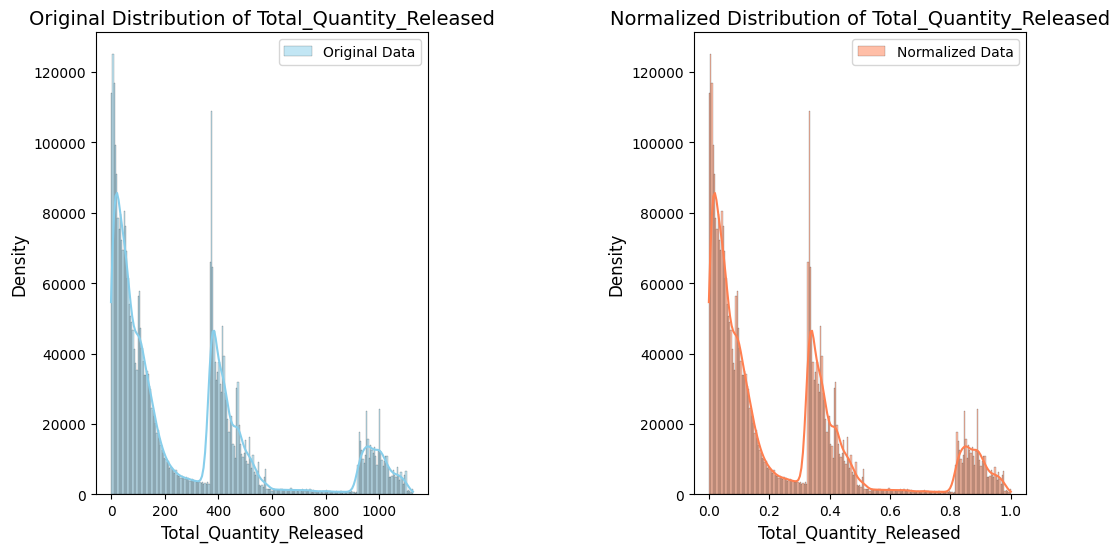

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df_comparison['Original'], ax=axes[0], kde=True, color='skyblue', label='Original Data')
axes[0].set_title(f'Original Distribution of {feature_to_visualize}', fontsize=14)
axes[0].set_xlabel(feature_to_visualize, fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend()

sns.histplot(df_comparison['Normalized'], ax=axes[1], kde=True, color='coral', label='Normalized Data')
axes[1].set_title(f'Normalized Distribution of {feature_to_visualize}', fontsize=14)
axes[1].set_xlabel(feature_to_visualize, fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend()

plt.subplots_adjust(wspace=0.8)
plt.show()

In [83]:
# Print head of df_encoded (DataFrame after normalization)
print("\nDataFrame after Normalization (df_encoded):")
df_encoded.head()


DataFrame after Normalization (df_encoded):


,reporting_year,company_name_x,facility_name,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,cas_number_x,...,release_total,Total_Quantity_Disposed_of,Total_Quantity_Released,Disposal_Release_Ratio,report_year,report_month,units_y_g TEQ,units_y_grams,units_y_kg,units_y_tonnes
0,2000-01-01,728,6,5,0.0,0,1018,0.665745,0.1989,237,...,0.006479,0.000008,0.336028,2.386018e-07,0.0,0.0,0,0,0,1
1,2000-01-01,728,6,5,0.0,0,1018,0.665745,0.1989,237,...,0.006479,0.000008,0.418569,1.915501e-07,0.0,0.0,0,0,0,1
2,2000-01-01,728,6,5,0.0,0,1018,0.665745,0.1989,237,...,0.006479,0.000008,0.385038,2.082311e-07,0.0,0.0,0,0,0,1
3,2000-01-01,728,6,5,0.0,0,1018,0.665745,0.1989,237,...,0.006479,0.000008,0.338223,2.370529e-07,0.0,0.0,0,0,0,1
4,2000-01-01,728,6,5,0.0,0,1018,0.665745,0.1989,237,...,0.006479,0.000008,0.331997,2.414990e-07,0.0,0.0,0,0,0,1


In [84]:
df_encoded.tail()

,reporting_year,company_name_x,facility_name,estimation_method,npri_id,province_x,city,latitude_x,longitude_x,cas_number_x,...,release_total,Total_Quantity_Disposed_of,Total_Quantity_Released,Disposal_Release_Ratio,report_year,report_month,units_y_g TEQ,units_y_grams,units_y_kg,units_y_tonnes
3812923,2022-01-01,916,1002,13,0.110535,0,2761,0.629996,0.216497,255,...,0.046995,0.0,0.093140,0.0,1.000000,0.0,0,0,0,1
3812924,2022-01-01,916,1002,13,0.110538,0,1134,0.671323,0.149075,255,...,0.047263,0.0,0.093547,0.0,1.000000,0.0,0,0,0,1
3812925,2022-01-01,916,1002,13,0.110541,0,1520,0.614572,0.193271,255,...,0.047531,0.0,0.094013,0.0,1.000000,0.0,0,0,0,1
3812926,2021-01-01,7659,8688,13,1.000000,0,1405,0.657305,0.170252,255,...,0.037938,0.0,0.027820,0.0,0.954545,0.0,0,0,0,1
3812927,2022-01-01,7659,8688,13,1.000000,0,1405,0.657305,0.170252,255,...,0.047799,0.0,0.112526,0.0,1.000000,0.0,0,0,0,1


## 4. Feature Selection

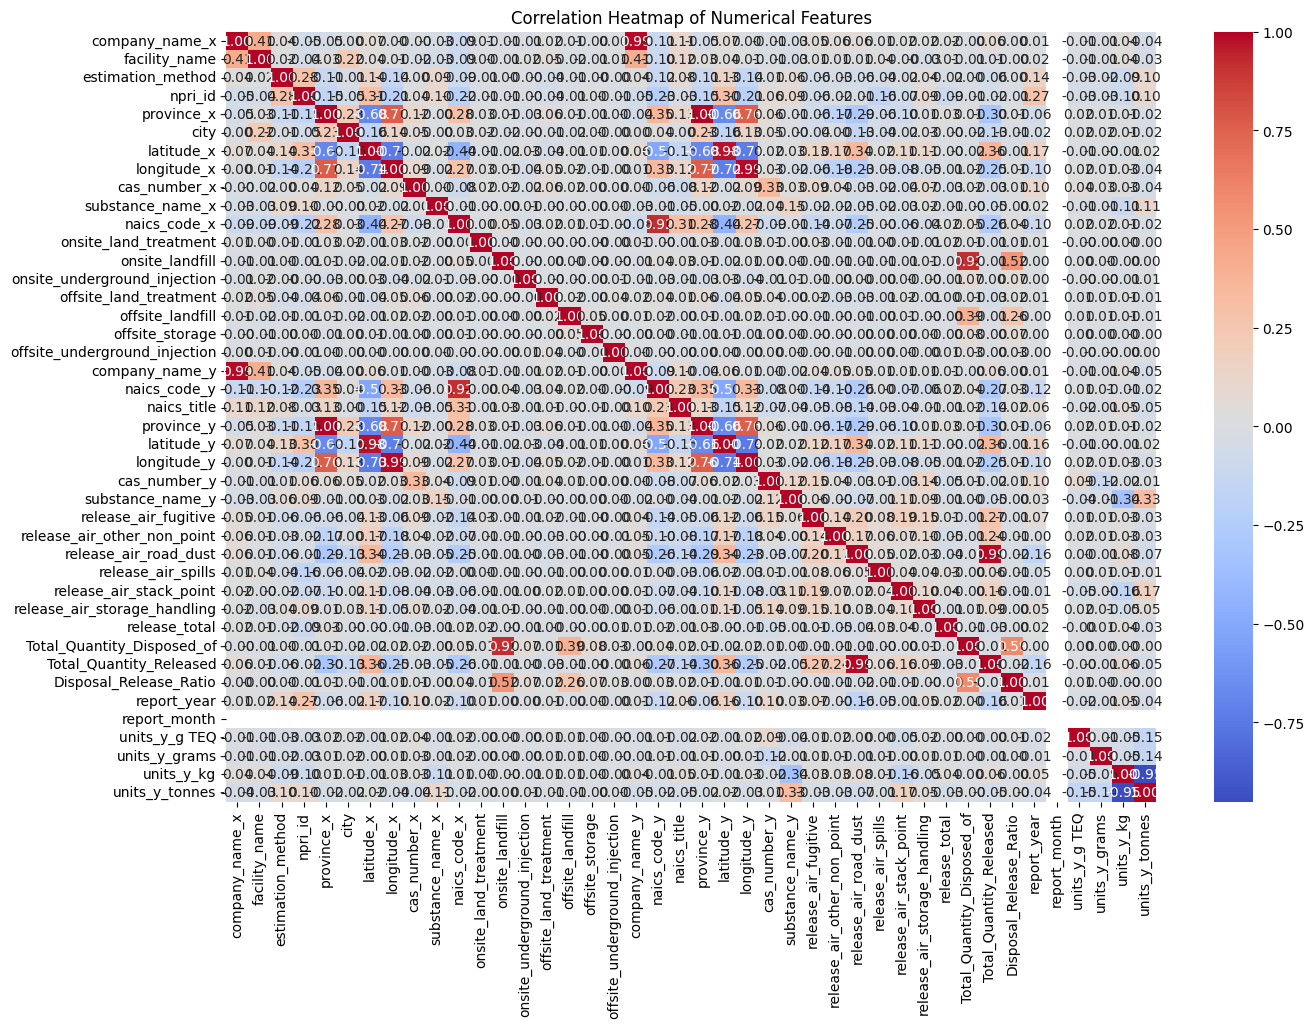

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df_encoded.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df_encoded[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **Observation**

The heatmap reveals a strong positive correlation between Total_Quantity_Released and release_air_stack_point, suggesting that stack or point sources are major contributors to the overall release of substances. There are also moderate positive correlations between various release types (e.g., release_air_fugitive and release_air_storage_handling), indicating potential relationships in release mechanisms. Most other features show weak or no linear correlation, suggesting they are relatively independent.

Additionally, features such as release_air_fugitive, release_air_road_dust, and release_air_other_non_point also show moderate correlations with total air emissions, supporting their inclusion in predictive analysis. Conversely, categorical or identifier-based features (e.g., company_name, facility_name, npri_id, province, city) show negligible or no correlation with air contaminant levels and can be excluded from forecasting models to reduce noise and dimensionality.


In [86]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in ['company_name_x', 'facility_name', 'province_x', 'city', 'cas_number_x']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col]) # Changed df to df_encoded
    encoders[col] = le

In [87]:
# Decode the values after feature selection
for col in ['company_name_x', 'facility_name', 'province_x', 'city', 'cas_number_x']:
    df_encoded[col] = encoders[col].inverse_transform(df_encoded[col]) # Use df_encoded instead of df

In [88]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

# Set the target variable
target_column = 'release_total'

# Extract numeric features
numeric_df = df_encoded.select_dtypes(include='number')

# Identify and handle constant columns
constant_cols = [col for col in numeric_df.columns if numeric_df[col].std() == 0]
numeric_df = numeric_df.drop(columns=constant_cols)  # Drop constant columns

# Compute Pearson correlation and p-value for numeric features
correlation_results = []

for col in numeric_df.columns: # Added a for loop here
    if col != target_column:
        try:
            corr, p_value = pearsonr(numeric_df[col], numeric_df[target_column])
            correlation_results.append((col, corr, p_value))
        except:
            pass  # Skip any constant or invalid columns

# Convert to DataFrame and sort
correlation_df = pd.DataFrame(correlation_results, columns=['feature', 'correlation', 'p_value'])
correlation_df['abs_corr'] = correlation_df['correlation'].abs()
correlation_df = correlation_df.sort_values(by='abs_corr', ascending=False)

#  Filter top correlated features with significant p-values
top_n = 15
p_threshold = 0.05

top_features = correlation_df[correlation_df['p_value'] < p_threshold].head(top_n)['feature'].tolist()

In [89]:
# Add important categorical variables manually
important_categoricals = [
    'substance_name_x',  # critical for understanding pollutants
    'province_x',        # helps track regional trends
    'report_year',       # essential for time-based prediction
    'report_month',      # seasonal trends
    'facility_name',
]

# Final feature list
final_selected_features = top_features + important_categoricals

#print("Selected features for modeling:")
for f in final_selected_features:
    print("-", f)

- npri_id
- release_air_other_non_point
- cas_number_y
- release_air_stack_point
- units_y_kg
- release_air_road_dust
- release_air_spills
- province_y
- province_x
- Total_Quantity_Released
- units_y_tonnes
- cas_number_x
- company_name_x
- report_year
- naics_code_x
- substance_name_x
- province_x
- report_year
- report_month
- facility_name


In [90]:
# Identify all columns ending with _x and _y
x_cols = [col for col in df_encoded.columns if col.endswith('_x')]
y_cols = [col for col in df_encoded.columns if col.endswith('_y')]

# Match corresponding _x and _y columns
for x_col in x_cols:
    base_name = x_col[:-2]  # remove '_x'
    y_col = base_name + '_y'

    if y_col in df_encoded.columns:
        # Check if the columns are equal (or almost equal)
        same_values = (df_encoded[x_col] == df_encoded[y_col])
        similarity_ratio = same_values.mean()  # proportion of matching values

        if similarity_ratio > 0.98:  # if 98%+ values are the same
            print(f"Dropping {y_col}, keeping {x_col} (Similarity: {similarity_ratio:.2%})")
            df_encoded.drop(columns=[y_col], inplace=True)
            df_encoded.rename(columns={x_col: base_name}, inplace=True)
        else:
            print(f"Keeping both {x_col} and {y_col} (Similarity: {similarity_ratio:.2%})")

Keeping both company_name_x and company_name_y (Similarity: 0.00%)
Dropping province_y, keeping province_x (Similarity: 100.00%)
Keeping both latitude_x and latitude_y (Similarity: 0.01%)
Keeping both longitude_x and longitude_y (Similarity: 0.00%)
Keeping both cas_number_x and cas_number_y (Similarity: 7.05%)
Keeping both substance_name_x and substance_name_y (Similarity: 2.24%)
Keeping both naics_code_x and naics_code_y (Similarity: 0.00%)


In [91]:
columns_to_keep = [
    # Time Features
    'reporting_year', 'Report Year', 'Report month',

    # Location and industry
    'province_x', 'city', 'naics_code_x',

    # Facility and substance
    'facility_name', 'substance_name_x',

    # Emissions-related
    'release_air_fugitive', 'release_air_other_non_point',
    'release_air_road_dust', 'release_air_spills',
    'release_air_stack_point', 'release_air_storage_handling',
    'release_total', 'Total_Release', 'Total_Disposal',
    'Disposal_Release_Ratio'
]


In [92]:
columns_to_drop = [
    'company_name_x', 'company_name_y', 'province_y',
    'latitude_x', 'longitude_x', 'latitude_y', 'longitude_y',
    'cas_number_x', 'cas_number_y',
    'substance_name_y', 'naics_code_y', 'naics_title',
    'onsite_land_treatment', 'onsite_landfill', 'onsite_underground_injection',
    'offsite_land_treatment', 'offsite_landfill', 'offsite_storage',
    'offsite_underground_injection', 'estimation_method', 'units_x', 'units_y'
]


In [93]:
df_encoded.rename(columns={
    'province_x': 'province',
    'naics_code_x': 'naics_code',
    'substance_name_x': 'substance_name'
}, inplace=True)
